In [163]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats
import seaborn as sns

# Task 1

In [164]:
# loading data
df = pd.read_csv("data\\SAheart.data").set_index("row.names")

# string features encoding
df.loc[df["famhist"]=="Present", ["famhist"]] = 1
df.loc[df["famhist"]=="Absent", ["famhist"]] = 0

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


### - I

In [165]:
# splitting data to X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

model = LogisticRegression(penalty=None, max_iter=1000).fit(X, y)

### - II

In [166]:
# Wald's test
sterr = np.array(model.coef_.std()/(X.shape[0]**0.5))
sterr = sterr.reshape(1,-1)
z_scores = model.coef_ / sterr
p_values = (1 - norm.cdf(np.abs(z_scores))) * 2

# print results
print("Results:")
for i in range(X.shape[1]):
    print(f"Feature {i}: Coef={model.coef_[0][i]:.4f}, p-value={p_values[0][i]:.4f}, {model.feature_names_in_[i]}")
print("\n")

# print significant Features
print("SIgnificant features:")
for i in range(X.shape[1]):
    if p_values[0][i]<0.1:
        print(f"Feature {i}: Coef={model.coef_[0][i]:.4f}, p-value={p_values[0][i]:.4f}, {model.feature_names_in_[i]}")

Results:
Feature 0: Coef=0.0065, p-value=0.6238, sbp
Feature 1: Coef=0.0793, p-value=0.0000, tobacco
Feature 2: Coef=0.1739, p-value=0.0000, ldl
Feature 3: Coef=0.0186, p-value=0.1622, adiposity
Feature 4: Coef=0.9262, p-value=0.0000, famhist
Feature 5: Coef=0.0396, p-value=0.0029, typea
Feature 6: Coef=-0.0629, p-value=0.0000, obesity
Feature 7: Coef=0.0001, p-value=0.9927, alcohol
Feature 8: Coef=0.0452, p-value=0.0007, age


SIgnificant features:
Feature 1: Coef=0.0793, p-value=0.0000, tobacco
Feature 2: Coef=0.1739, p-value=0.0000, ldl
Feature 4: Coef=0.9262, p-value=0.0000, famhist
Feature 5: Coef=0.0396, p-value=0.0029, typea
Feature 6: Coef=-0.0629, p-value=0.0000, obesity
Feature 8: Coef=0.0452, p-value=0.0007, age


### - III

In [167]:
arg = np.argmax(model.feature_names_in_=='age')

coef = {model.feature_names_in_[i]: model.coef_[0][i] for i in range(len(model.feature_names_in_))}
coef["intercept"] = model.intercept_[0]

coef


{'sbp': 0.006520980170637254,
 'tobacco': 0.07933269789387165,
 'ldl': 0.17394383698974514,
 'adiposity': 0.01858523592698129,
 'famhist': 0.9262020599473035,
 'typea': 0.03961007779213418,
 'obesity': -0.06289924838408005,
 'alcohol': 0.00012231323567697875,
 'age': 0.045236300977123695,
 'intercept': -6.155082231774178}

Coefficient coressponding to variable age can be interpreted as

### - IV

In [168]:
first_patient = np.array(X.loc[1,:]).reshape(1,-1)
proba = model.predict_proba(first_patient)
print(f"For the first patient predicted probability of the heart attack is {proba[0,1]*10000//1/100}%")

For the first patient predicted probability of the heart attack is 71.22%


# Task 2

In [169]:
df = pd.read_csv("data\\earthquake.txt", sep=' ', decimal=".")
df.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


### - I

<Axes: xlabel='body', ylabel='surface'>

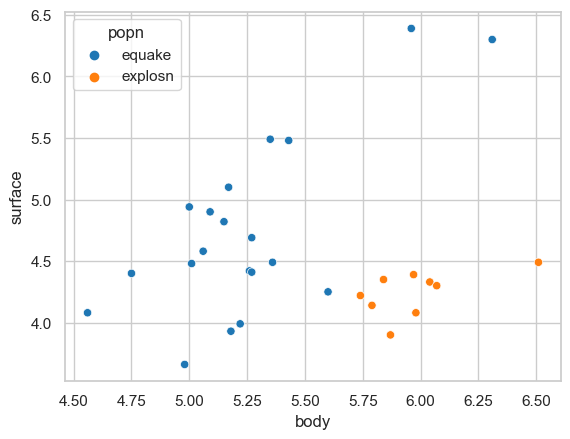

In [170]:
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.scatterplot(data=df, x="body", y="surface", hue="popn")

### - II

In [171]:
X, y = df.iloc[:,1:], df.iloc[:,0]

model = LogisticRegression(penalty=None, max_iter=1000, random_state=11)
model.fit(X, y)

# Wald's test
sterr = np.array(X.std()/(X.shape[0]**0.5))
sterr = sterr.reshape(1,-1)
z_scores = model.coef_ / sterr
p_values = (1 - norm.cdf(np.abs(z_scores))) * 2

n = X.shape[0]
p = X.shape[1]
X_with_intercept = np.hstack([np.ones((n, 1)), X])
var_cov = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))
coef_var = var_cov.diagonal()[1:]
wald_stats = model.coef_[0] / np.sqrt(coef_var)
p_values = 2 * (1 - stats.norm.cdf(np.abs(wald_stats)))

# print results
print("Results:")
for i in range(p):
    print(f"Feature {i}: Coef={model.coef_[0][i]:.4f}, p-value={p_values[i]:.4f}, {model.feature_names_in_[i]}")
print("\n")

# print significant Features
print("SIgnificant features:")
for i in range(p):
    if p_values[i]<0.1:
        print(f"Feature {i}: Coef={model.coef_[0][i]:.4f}, p-value={p_values[i]:.4f}, {model.feature_names_in_[i]}")

Results:
Feature 0: Coef=146.4089, p-value=0.0000, body
Feature 1: Coef=-151.8120, p-value=0.0000, surface


SIgnificant features:
Feature 0: Coef=146.4089, p-value=0.0000, body
Feature 1: Coef=-151.8120, p-value=0.0000, surface


In [172]:
z_scores

array([[ 1632.22026389, -1259.44301006]])